<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla y Ignacio Meza D.
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias y Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Luis Figueroa
- Nombre de alumno 2: Felipe Méndez


### **Link de repositorio de GitHub:** `https://github.com/Felipe-mendezp/Labs-Figueroa-Mendez`

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
import os

try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = '/content/drive/MyDrive/Laboratorios'
except:
    print('Ignorando conexión drive-colab')

os.chdir(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(4)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0


## 2. Clasificación de pacientes con diabetes (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.), comente sus decisiones y los resultados obtenidos con el modelo. ¿Es acaso un buen predictor de diabetes?, ¿Qué buscan explicar las métricas utilizadas?, ¿las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo una buena elección de las features?.

In [ ]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from xgboost import plot_importance

# !pip install xgboost
import xgboost as xgb

In [ ]:
# Separamos la variable 'Diabetes' del resto
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

# Separamos la data en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

In [ ]:
# Identificamos las variables numéricas
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns


# Aplicamos StandardScaler a dichas variables
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numeric_features)])

# APLICAR OTRAS TRANSFORMACIONES A LO MEJOR

In [ ]:
# Creamos el pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', XGBClassifier(random_state=12345))])

In [ ]:
# Entrenamos el pipeline
pipeline.fit(X_train, y_train)

# Generamos las predicciones
y_pred = pipeline.predict(X_test)

In [ ]:
# Vemos el classificaton_report con las métricas
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74     10588
         1.0       0.73      0.80      0.76     10620

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



## 3. Importancia de las features con XGBoost (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

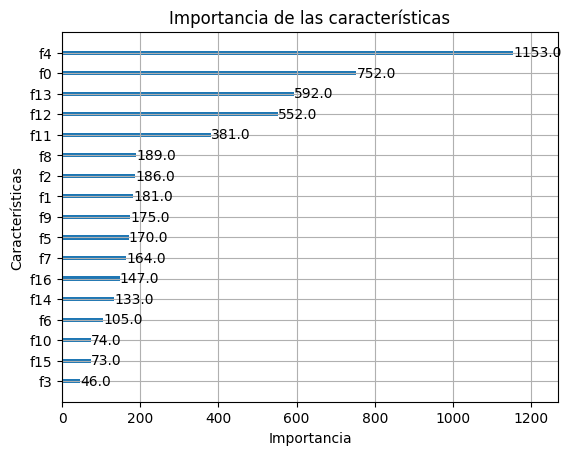

In [ ]:
# Nombre de las columnas
feature_names = X_train.columns.tolist()

# Plot de importancia
xgb.plot_importance(pipeline.named_steps['classifier'], importance_type='weight')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las características')
plt.show()

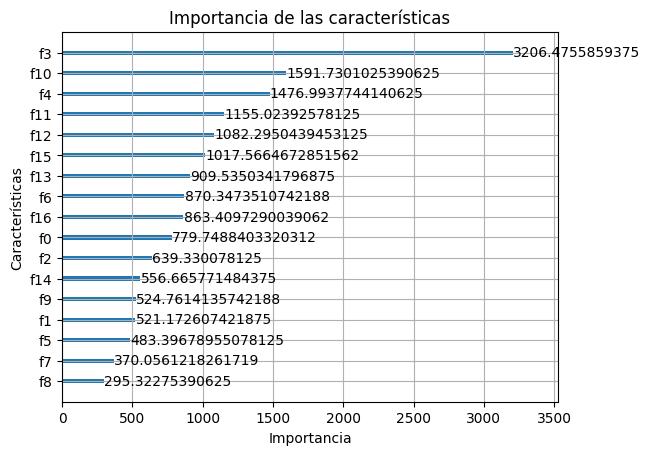

In [ ]:
# Plot de importancia
xgb.plot_importance(pipeline.named_steps['classifier'], importance_type='cover')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las características')
plt.show()

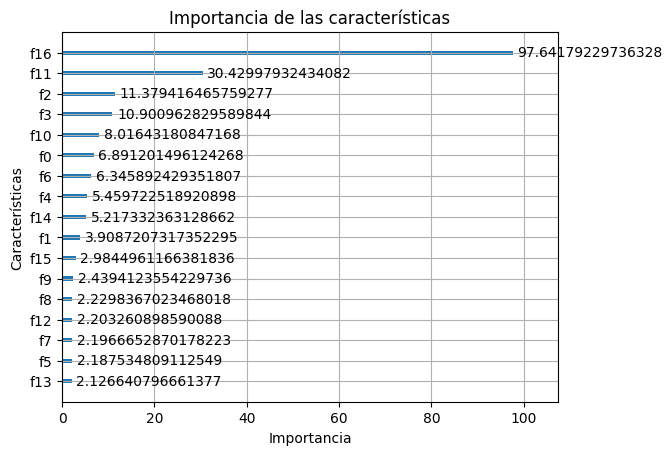

In [ ]:
# Plot de importancia
xgb.plot_importance(pipeline.named_steps['classifier'], importance_type='gain')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las características')
plt.show()

**¿Los resultados obtenidos con los diferentes métodos son compatibles?**

Los resultados de los métodos difieren, el feature más importantes es siempre distinto dependiendo del método. Si bien existen algunas características catalogadas dentro del top 5 más importante en dos o tres de los métodos, existen grandes diferencias y no son concluyentes los resultados. Los resultados desiguales pueden deberse a las distintas fórmulas de cálculo utilizadas por cada método, así como a la estructura específica del conjunto de datos y a las configuraciones del modelo. Estas diferencias pueden generar variaciones en los resultados, resaltando aspectos como la frecuencia de uso de la característica, la ganancia de información o la cobertura en los nodos del árbol. Por lo tanto, es importante considerar estas divergencias y comprender que cada método proporciona una perspectiva única y complementaria sobre la importancia de las características en el modelo.

**¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles?**

En base a los anterior, se observa que las importancias varían en los tres modelos, esto puede indicar que hay cierta inconsistencia en la interpretación de la importancia de las características. En tal caso, nosotros creemos que la interpretabilidad del modelo basado en árboles puede verse comprometida, ya que las discrepancias en las importancias dificultan una comprensión clara y consistente de cómo cada característica influye en las predicciones del modelo. La consistencia y estabilidad en las importancias de las características son aspectos esenciales para obtener una interpretabilidad sólida. Si las importancias varían significativamente entre los diferentes métodos, puede ser más difícil confiar en las conclusiones sobre la importancia de las características y utilizarlas para una interpretación efectiva del modelo.

**¿Qué debilidad presenta este método?**

Los modelos basados en árboles presentan debilidades en términos de interpretabilidad, como las interacciones complejas entre características, donde la importancia de una característica puede depender de su relación con otras características en el árbol, dificultando la interpretación a nivel individual. Además, estos modelos son sensibles al ruido y pequeñas variaciones en los datos de entrenamiento pueden generar árboles y, por lo tanto, importancias de características ligeramente diferentes, afectando la estabilidad y consistencia de las importancias. También hay limitaciones en la generalización de las importancias, ya que estas pueden no ser directamente aplicables a otros conjuntos de datos o contextos, lo que afecta la interpretabilidad si las importancias no se mantienen consistentes en diferentes escenarios. Estas debilidades resaltan la necesidad de una interpretación cuidadosa y consideración de las limitaciones inherentes a los modelos basados en árboles para lograr una interpretabilidad efectiva.

## 4. Métodos Agnósticos Globales (1 pt)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. Visualice los resultados de este método en un gráfico. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala está?). Además, responda las siguientes preguntas:


- ¿Cómo mide la importancia de las features su propuesta?
- ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?
- ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
- Nombre y explique 3 ventajas y 3 desventajas del método implementado.

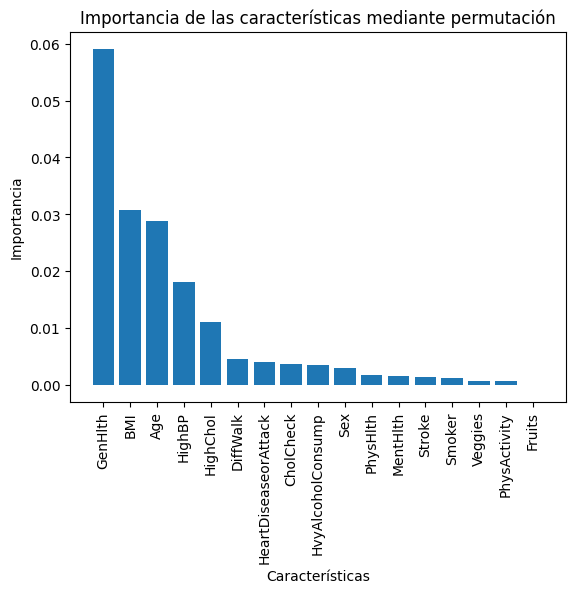

Desviación estándar de las importancias: 0.01540100394434513


In [ ]:
original_metric = accuracy_score(y_test, y_pred)

importances = []
n_iterations = 30

for feature in X_test.columns:
    importance_scores = []

    for _ in range(n_iterations):
        X_permuted = X_test.copy()
        X_permuted[feature] = np.random.permutation(X_permuted[feature])

        y_pred_permuted = pipeline.predict(X_permuted)
        permuted_metric = accuracy_score(y_test, y_pred_permuted)

        importance_score = original_metric - permuted_metric
        importance_scores.append(importance_score)

    importances.append(np.mean(importance_scores))

importance_std = np.std(importances)

# Ordenamos en orden descendente
sorted_indices = np.argsort(importances)[::-1]
sorted_features = X_test.columns[sorted_indices]
sorted_importances = np.array(importances)[sorted_indices]

# Plot
plt.bar(sorted_features, sorted_importances)
plt.xticks(rotation=90)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las características mediante permutación')
plt.show()

print("Desviación estándar de las importancias:", importance_std)

**¿Cómo mide la importancia de las características su propuesta?**


En este caso, la importancia de las características se mide calculando la diferencia entre la métrica de evaluación (precisión en este ejemplo) en el conjunto de prueba original y en el conjunto de prueba permutado. Si la permutación de una característica afecta negativamente la métrica de evaluación, se considera que esa característica es importante para el modelo.

**¿Qué características tienen un mayor impacto en la salida del modelo? Comente las 5 primeras, ¿Tienen sentido?**

Se observa que las 5 características con mayor impacto son `GenHlth`, `BMI`,
`Age`, `HighBP` y `HighChol`. Estas a priori si tienen sentidos pues son facotres importantes para cualquier tipo de enfermedad, uno pensaría que la edad, en presión cardiaca, colesterol y índice de masa corporal tienen una gran influencia en las diabetes y son características que hay que monitorear constantemente.

**¿Cómo cambian sus conclusiones con respecto a las importancias de las características del punto anterior?**

Cambian pues en esta caso se identifican de manera clara las características con mayor impacto, en donde en algunos casos concuerda con las del punto anterior, pero no siempre.

**Nombre y explique 3 ventajas y 3 desventajas del método implementado.**

Ventajas:
1. Interpretabilidad: El método de permutación proporciona una medida directa de la importancia de las características al evaluar cómo afecta la permutación de cada característica a la métrica de evaluación. Esto facilita la interpretación de qué características son más relevantes para el modelo.

2. Robustez: El método de permutación es robusto frente a la correlación entre características. Al permutar una característica, se rompe la relación con otras características, lo que permite evaluar la importancia de una característica específica independientemente de las demás.

3. Flexibilidad: El método de permutación se puede aplicar a diferentes métricas de evaluación, lo que permite evaluar la importancia de las características en función de diferentes criterios, como precisión, recall, F1-score, entre otros. Además, se puede ajustar la cantidad de iteraciones para obtener una medida más precisa de la importancia.

Desventajas:
1. Eficiencia computacional: El método de permutación puede ser computacionalmente costoso, especialmente si se tienen muchas características y se realizan muchas iteraciones. El cálculo de las métricas de evaluación para cada permutación puede llevar tiempo, lo que puede limitar su aplicación en conjuntos de datos grandes.

2. Sesgo de sobreestimación: El método de permutación puede tender a sobreestimar la importancia de las características si existe una alta correlación entre características redundantes. Al permutar una característica, otras características altamente correlacionadas pueden compensar y mantener el rendimiento del modelo, lo que puede llevar a una sobreestimación de la importancia de la característica permutada.

3. Dependencia del modelo: El método de permutación es específico del modelo entrenado y depende de la métrica de evaluación utilizada. Diferentes modelos y métricas pueden dar lugar a diferentes medidas de importancia de características. Por lo tanto, es importante tener en cuenta el contexto del problema y los resultados obtenidos para una interpretación adecuada.

## 5. Métodos Agnósticos Locales (2 pt)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### Parte A (0.4 pt)

Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. ¿Qué representa cada número en su resultado? ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?

In [ ]:
!pip install shap

In [ ]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


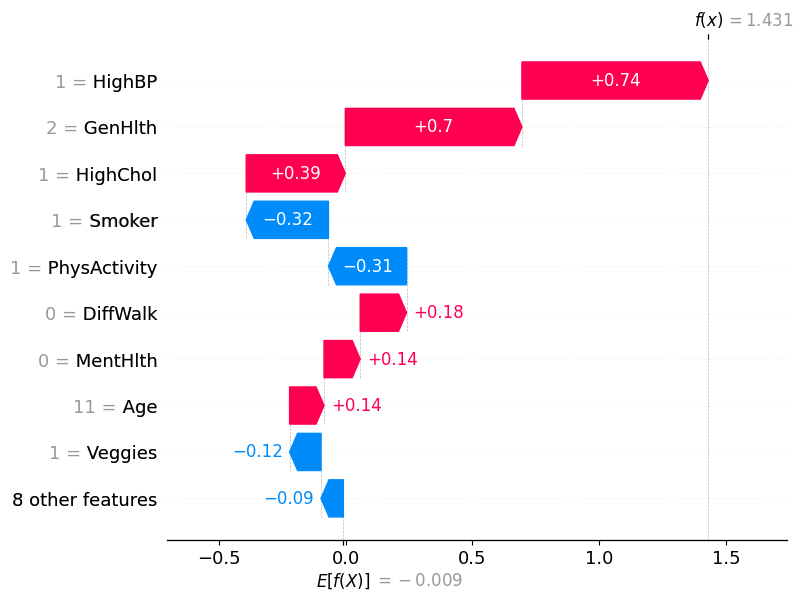

In [ ]:
import shap

# Calculamos los shap values
explainer = shap.Explainer(pipeline.named_steps['classifier'])
shap_values = explainer(X_test)

# Plot de los shap values
shap.plots.waterfall(shap_values[0])

**¿Qué representa cada número en su resultado?**

Cada número del gráfico representa la contribución de una característica específica al cambio en el valor de la predicción en comparación con el valor base. Una barra más grande en el gráfico corresponde a una contribución más significativa, ya sea positiva o negativa, de una característica específica en el cambio del valor de la predicción.

**¿Es posible atribuir un significado a la positividad/negatividad de cada valor?**

Si, barras más grande hacia la derecha (rojo) indican una contribución positiva, mientras que las barras más grandes hacia la izquierda (azul) indican una contribución negativa en el cambio del valor de la predicción.

### Parte B (0.4 pt)

Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:
- ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes?
- ¿Existe algún patrón común entre las instancias analizadas?
- ¿Es posible generalizar estas conclusiones a todo el dataset?

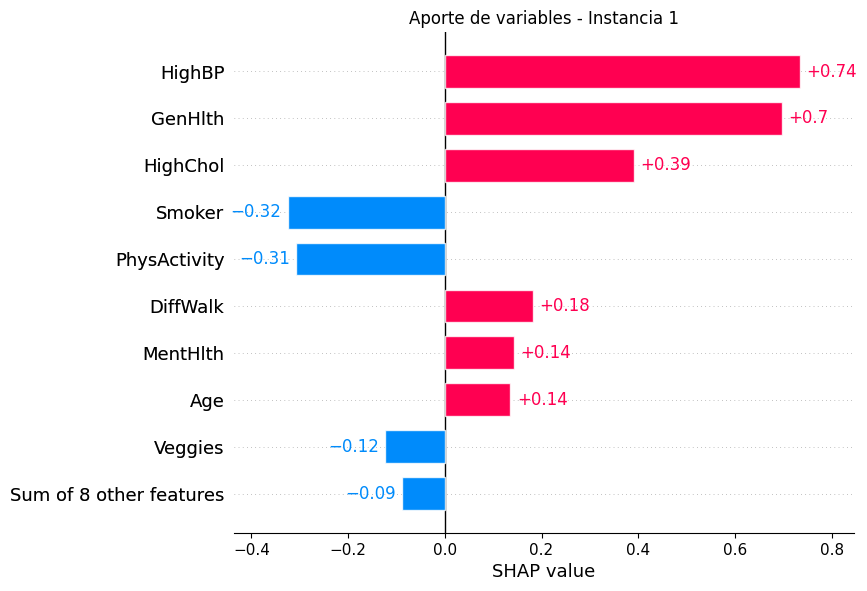

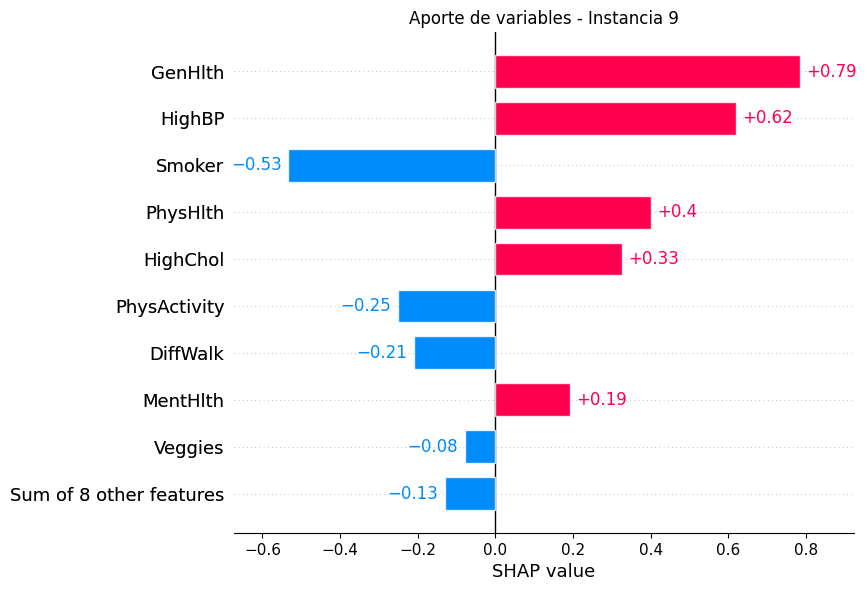

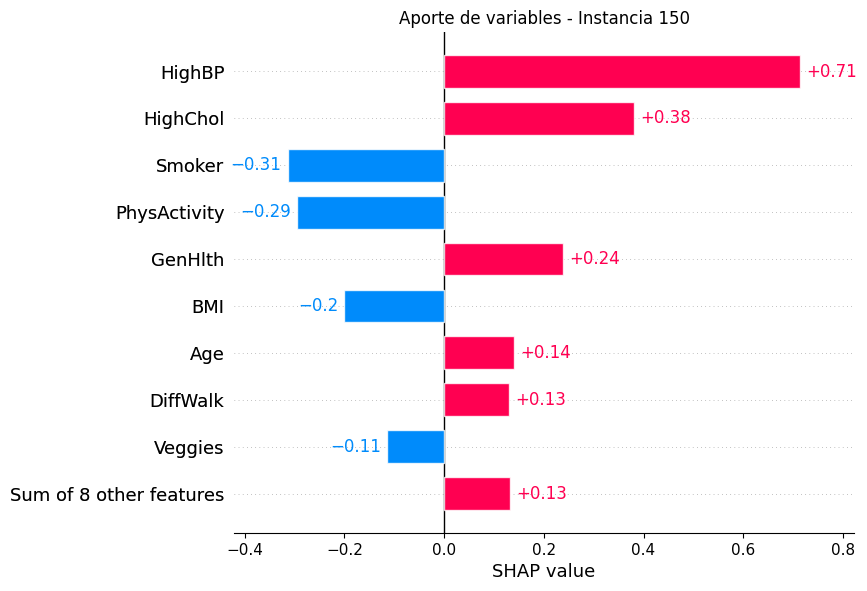

In [ ]:
# Aporte de variables para la instancia 1
shap.plots.bar(shap_values[0], show=False)
plt.title("Aporte de variables - Instancia 1")
plt.show()

# Aporte de variables para la instancia 9
shap.plots.bar(shap_values[8], show=False)
plt.title("Aporte de variables - Instancia 9")
plt.show()

# Aporte de variables para la instancia 150
shap.plots.bar(shap_values[149], show=False)
plt.title("Aporte de variables - Instancia 150")
plt.show()

**¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes?**
Existen varias variables que tienen efectos postivos en la probabilidad de obtener diabetes, como tener alto BP y colesterol. Asi mismo se ve que variables como el tener actividad fisica  y ser fumador afectan negativamente la probabilidad de obtener diabetes.

**¿Existe algún patrón común entre las instancias analizadas?**
Se encuentra varios patrones, principalmente, el hecho de que el signo del efecto de las variables que se mencionaron anteriormente se repiten en todas las instancias analizadas. Mas generalizado, personas que lo que podria considerarse una buena saludu, es decir, niveles normales de colestero y BP, ademas de realizar actividad fisica disminuyen la probabilidad de tener diabetes. Sin embargo, se encuentra un patron extraño, pues segun los resultados obtenidos las personas fumadora tienen menos probabilidad de obtener diabetes. Esto no concuerda con el hecho de tener una buena salud o actividad fisica.

**¿Es posible generalizar estas conclusiones a todo el dataset?**


Los valores SHAP proporcionan una medida localizada y explicativa de la contribución de cada característica en la predicción de una instancia específica. Como tal, es importante recordar que estos son altamente específicos a la instancia para la que se calcularon y no necesariamente reflejan el comportamiento del modelo en todos los datos.



### Parte C (0.4 pt)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


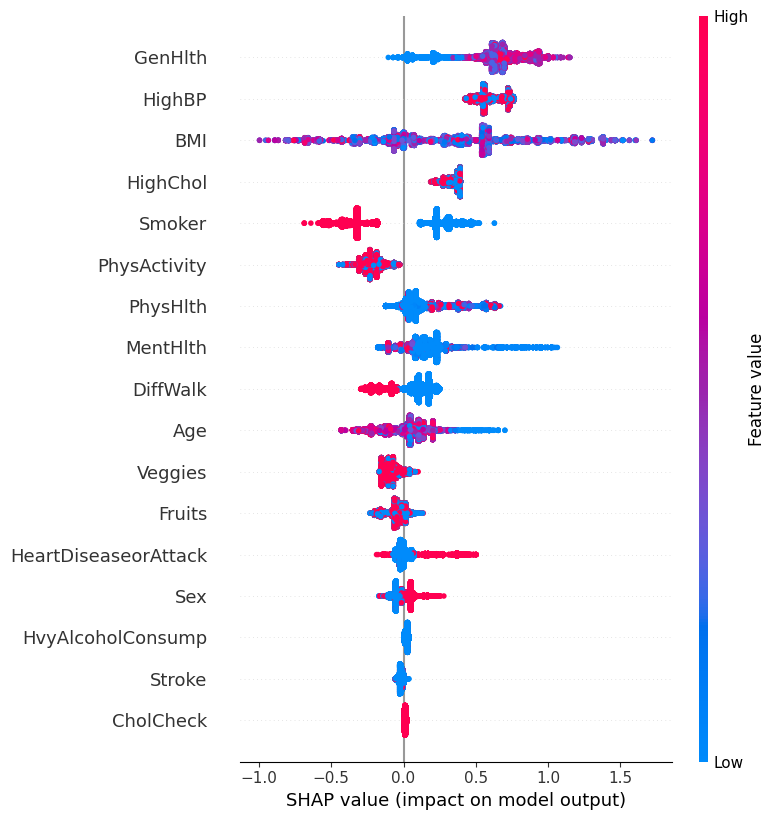

In [ ]:
# Aporte de cada feature a nivel global
shap.summary_plot(shap_values, X_test)

Existen variables que tienen comportamientos similiares a los encontrados en el analisis por instacia, sin embargo, se observa que para las variables que indican un alto colestero no se encuentra patrones que afecten de la misma manera al conjunto de datos. Caso contrario ocurre en el caso de la varaible que indica ser fumador, donde se repite el patron de que los fumadores tienen menor probabilidad de tener diabetes.

### Parte D (0.4 pt)

Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

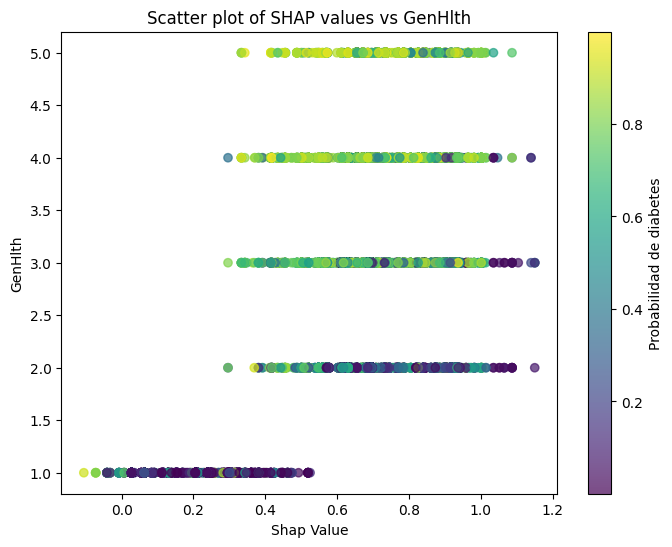

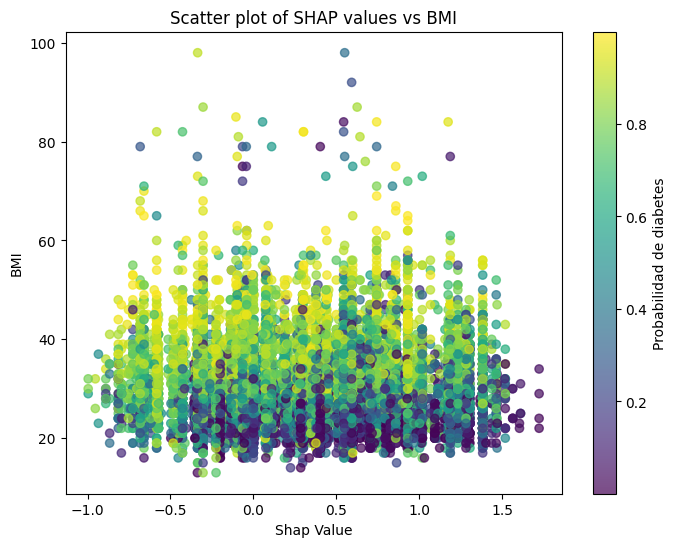

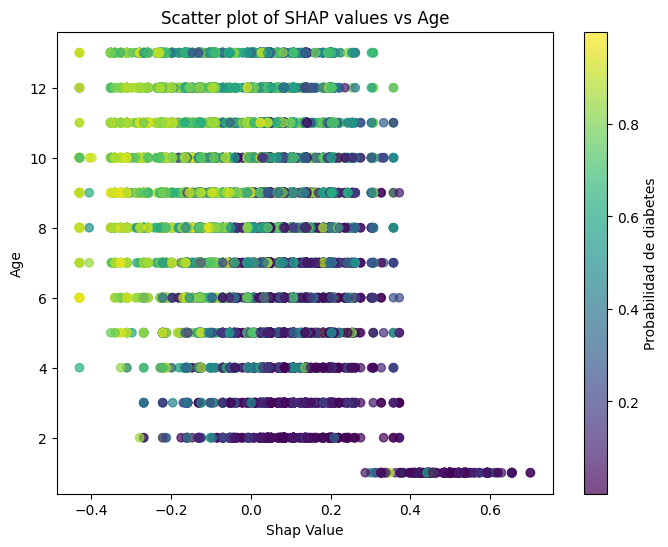

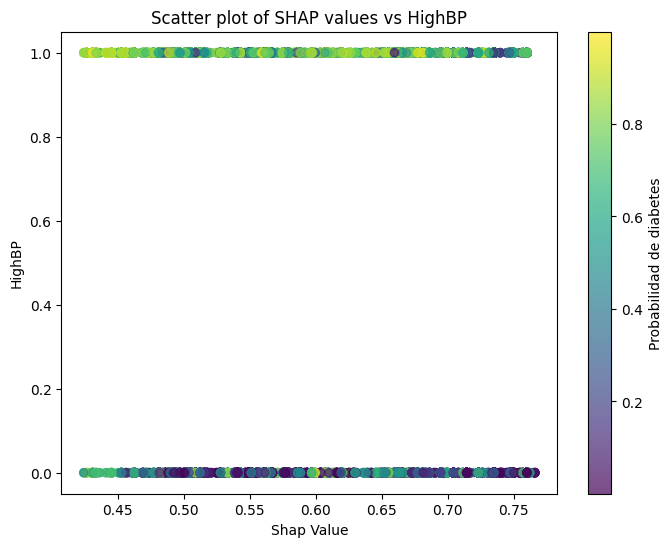

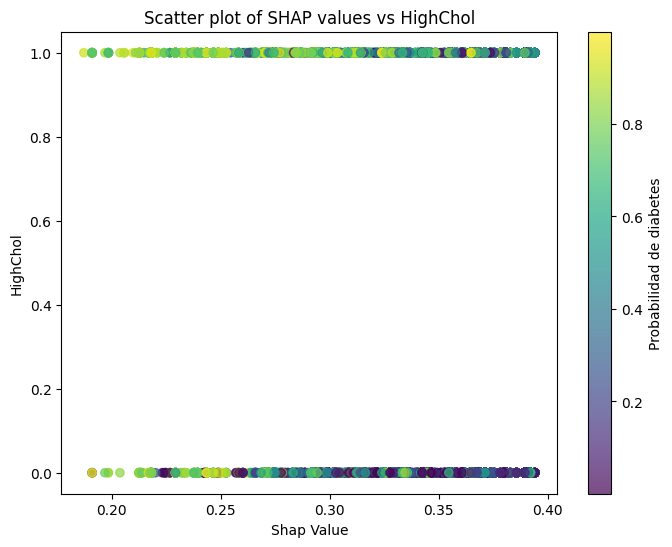

In [ ]:
important_features = sorted_features[:5]

prob_diabetes = pipeline.predict_proba(X_test)[:, 1]

for feature in important_features:
    feature_index = list(X_test.columns).index(feature)

    # Creamos un scatterplot por cada feature
    plt.figure(figsize=(8,6))
    plt.scatter(shap_values.values[:, feature_index], X_test[feature], c=prob_diabetes, alpha=0.7)
    plt.colorbar(label='Probabilidad de diabetes')
    plt.xlabel('Shap Value')
    plt.ylabel(feature)
    plt.title('Scatter plot of SHAP values vs ' + feature)
    plt.show()


Al inspeccionar los gráficos para cada característica, notamos que la mayoría presentan correlaciones con los valores SHAP, lo que indica que estas características son predictivas para el diagnóstico de diabetes. Observamos que los puntos con alta probabilidad de tener diabetes tienden a agruparse en áreas específicas en estos gráficos, lo que respalda la afirmación de que estas características son, efectivamente, predictivas.

Una excepción notable es el Índice de Masa Corporal (BMI). No observamos una correlación clara entre los valores SHAP y el BMI. Sin embargo, es importante recordar que los valores SHAP no necesariamente deben mostrar una relación directa con las características para que estas sean informativas o útiles para el modelo. De hecho, al analizar el gráfico para el BMI, observamos que los valores más bajos de esta característica se asocian con una menor probabilidad de tener diabetes. Esto sugiere que, aunque la relación no es claramente discernible a través de los valores SHAP, el BMI puede estar desempeñando un papel en las predicciones del modelo, y su contribución puede ser más compleja que una relación lineal o monótona.

### Parte E (0.4 pt)

Finalmente, se le pide generar un gráfico del tipo **Partial Dependence Plot** para las mismas 5 variables con mayor impacto global usando una submuestra de **1000 observaciones**. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

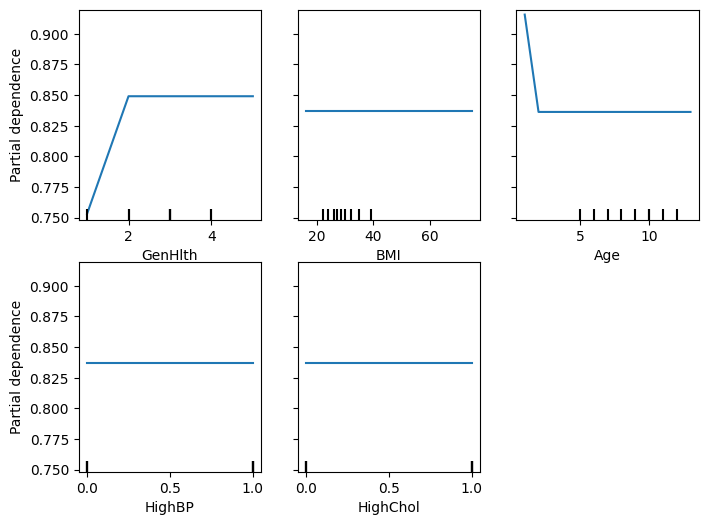

In [ ]:
from sklearn.inspection import PartialDependenceDisplay


# Asumiendo que ya tienes las 5 características más importantes
important_features = sorted_features[:5]

# Vamos a utilizar una submuestra de 1000 observaciones
sample = X_test.sample(1000)

fig, ax = plt.subplots(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(pipeline.named_steps['classifier'], sample,important_features, ax=ax)

plt.show()



Vemos que las variables BMI, HighBP y HighChol tienen curvas planas, lo que indica que la característica tiene poco efecto en la salida del modelo. La variable GEnHlth tiene una pendiente positiva, es decir, hay una relación positiva entre la característica y la salida del modelo. Caso contrario es el de la variable Age, que al tener una pendiente negativa indica que hay una relacion negativa entre la caracteristica y la salida del modelo.

En cuanto a si estas conclusiones son generalizables para todo el conjunto de datos, es posible que no lo sean. Los PDPs muestran el efecto promedio de una característica en la salida del modelo, pero este efecto puede variar para diferentes observaciones. En particular, si hay interacciones entre las características, el efecto de una característica puede depender del valor de otras características. Por lo tanto, aunque los PDPs pueden proporcionar información valiosa sobre cómo una característica afecta en promedio la salida del modelo, no siempre capturan la totalidad de esta relación.

## 6. Sistema de Reglas! (1 pt)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [ ]:
!pip install alibi

In [ ]:
from alibi.explainers import AnchorTabular

In [ ]:
predict_fn = lambda x: pipeline.predict(pd.DataFrame(x, columns=X_test.columns))

explainer = AnchorTabular(predict_fn, feature_names=list(X_test.columns))

explainer.fit(X_test.values)

idx = 1000
explanation = explainer.explain(X_test.values[idx], threshold=0.95)
print('Observation:', idx)
print('Prediction:', explanation.anchor)
print('Precision:', explanation.precision)
print('Coverage:', explanation.coverage,'\n')



idx = 3001
explanation = explainer.explain(X_test.values[idx], threshold=0.95)
print('Observation:', idx)
print('Prediction:', explanation.anchor)
print('Precision:', explanation.precision)
print('Coverage:', explanation.coverage,'\n')

idx = 5751
explanation = explainer.explain(X_test.values[idx], threshold=0.95)
print('Observation:', idx)
print('Prediction:', explanation.anchor)
print('Precision:', explanation.precision)
print('Coverage:', explanation.coverage,'\n')


Observation: 1000
Prediction: ['BMI <= 25.00', 'HighChol <= 0.00', 'Age <= 7.00']
Precision: 0.9605855855855856
Coverage: 0.0726 

Observation: 3001
Prediction: ['GenHlth <= 2.00', 'HighBP <= 0.00', 'BMI <= 25.00']
Precision: 0.9864661654135338
Coverage: 0.1126 

Observation: 5751
Prediction: ['GenHlth > 3.00', 'HeartDiseaseorAttack > 0.00']
Precision: 0.9689655172413794
Coverage: 0.0849 



En este análisis, hemos empleado el método Anchors de la biblioteca Alibi para interpretar las decisiones del modelo utilizado para las observaciones individuales 1000, 3001 y 5751. Este método nos ha proporcionado reglas de decisión específicas para cada observación. Por ejemplo, para la observación 1000, el modelo genera una predicción específica si el índice de masa corporal (BMI) es menor o igual a 25.00, el indicador de colesterol alto (HighChol) es menor o igual a 0.00, y la edad (Age) es menor o igual a 7.00. Este conjunto de condiciones tiene una precisión del 95.3%, lo que indica que es correcto el 95.3% de las veces para las observaciones que cumplen estas condiciones. Sin embargo, la cobertura de estas reglas es de 7.41%, lo que significa que se aplican a aproximadamente el 7.41% de todas las observaciones en nuestro conjunto de datos. De manera similar, hemos obtenido reglas para las observaciones 3001 y 5751 con sus respectivas precisiones y coberturas.

Estas reglas de decisión proporcionan una valiosa comprensión de cómo nuestro modelo está tomando decisiones para estas observaciones específicas. Sin embargo, cabe destacar que las reglas son explicaciones locales y no necesariamente se aplican a todo el conjunto de datos. Es decir, aunque estas reglas tienen una alta precisión, su cobertura relativamente baja sugiere que sólo se aplican a una pequeña fracción de todas las observaciones, limitando su generalización.

# Retrospectiva... (1 pt)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

 Los métodos de interpretación local como los valores SHAP o Anchors son los mejores en este contexto, pues son muy útiles cuando se necesita entender la decisión específica del modelo para una observación en particular. Esta interpretación localizada puede ser muy útil en un contexto médico, donde a menudo es necesario explicar una decisión o predicción a un paciente o médico.

Para el problema del Dr. Simi, si el objetivo es proporcionar explicaciones personalizadas a los clientes sobre las predicciones de su modelo, entonces los métodos locales agnósticos serían más útiles. Esto se debe a que estas técnicas pueden proporcionar reglas claras y específicas sobre cómo se tomó la decisión del modelo para una observación individual, lo que podría ayudar a los clientes a entender y confiar en las predicciones del modelo.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>